In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 01 09:53:19 2015

@author: ElianeAparecidaCorre
"""

import scipy
from scipy.io.idl import readsav
from scipy import interpolate
from scipy import ndimage

#from scipy.stats import mean

from matplotlib.pyplot import *
from matplotlib import pyplot

import numpy as np

import math
import keyword
import pandas as pd
import collections


In [66]:
#dt definido como 20 como default
dt = 20

#longs = np.zeros(1,float)
#ffi = np.zeros(1,float)
#fa = np.zeros(1,float)

### Star Sport size
fa =  np.zeros([0.4,0.7,0.9],float)
#fa =  0.4

### Intensity of Star Spot
ffi = np.zeros([0.5,0.8,0.2],float)
#ffi = 0.5

### Star Spot Position 
longs = np.zeros([10,25,42],float)
#longs = -25

print(fa)
print (len(fa))
print (ffi)
print (len(ffi))
print(longs)
print (len(longs))

[]
0
[]
0
[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0. 

C:\Users\329494569\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\329494569\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [19]:
##caminho =  'Dropbox/projeto_programacao'
# Leitura do arquivo de dados do kepler
# s  =  Star, dados da estrela
s  =  readsav('paramk63.save')
#print(s)

In [20]:
r = s.r #solar radius in pixels
rp = s.rp #planetary radius in Rstar
a = s.a
inc = s.inc #inclination angle of orbital plane
per = s.per
wl = s.wl #Wave light

In [46]:
#capturando o tamanho do array de curva de luz(wl  =  wave light)
n = len(wl[:,0]) 
#print(n)

In [ ]:
#print(s.wl)

In [ ]:
## mx=mean(wl[n/2-20:n/2+20,n/2-20:n/2+20])
#mx = np.mean( s.wl[n/2-20:n/2+20,n/2-20:n/2+20] )
##mx = mean(s.wl[n/2-20:n/2+20,n/2-20:n/2+20])
#print(mx)
## half,findgen(n),wl[*,n/2],x1,x2,yval=mx/2.
#x1 = mx/2
#x2 = mx/2
#print(x1 + "|"+ x2)
##r = (x2-x1)/2.        # raio da estrela em pixels
#print (r)

In [47]:
#RS  =  raio da estrela
#Rs = s.rp*s.r
Rs = rp*r
#print(Rs)

In [48]:
ar = a*r
alfa = math.radians(inc)

In [49]:
#calculado o X e o Y por coordenadas esféricas
teta = np.arange((per*24.*float(dt)+0.5)-1)*360./(per*24*float(dt))
ii = np.where((teta >= 180) & (teta <= 360))
teta = np.radians(teta[ii]) 
xx = ar*np.cos(teta)
yy = ar*np.sin(teta)*math.cos(alfa)

xxp = xx
yyp = yy

pp = np.where((abs(xxp) < n/2*1.2) & (abs(yyp) < n/2))

xp = xxp[pp]
yp = yyp[pp]

jj = np.argsort(xp) 
xp = xp[jj]
yp = yp[jj]

wp = np.zeros(len(pp[0]))+np.sum(wl)

lat=(-math.asin((a)*math.cos(math.radians(inc))))/0.0174533
   ##print (lat)
x1 = np.arange(0,n,dtype = float)-n/2
y1 = np.arange(0,n,dtype = float)-n/2


In [50]:
##starspots
j = np.where((abs(longs) < 90.) | (longs > 270.) & (longs < 360.))
nspot = len(j[0])

In [ ]:
'''
def src(slat):
        if(slat==0):
            slat = np.array((-math.asin((a)*math.cos(math.radians(inc))))/0.0174533)
            print(slat)
        else:
            slat = slat[jj]
            print(slat)
'''

In [51]:
slat = np.array(-math.asin((a)*math.cos(math.radians(inc))))/0.0174533
print(slat)

-48.4550557857


In [52]:
print(longs)

lgs = longs[j]

print(lgs)

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  

In [64]:
print(ffi)
print( len(ffi) )
print(j)


fi = ffi[j]
print(fi)

[]
0
(array([0, 0, 0, ..., 9, 9, 9], dtype=int64), array([ 0,  0,  0, ..., 24, 24, 24], dtype=int64), array([ 0,  1,  2, ..., 39, 40, 41], dtype=int64))


IndexError: index 0 is out of bounds for axis 0 with size 0

In [54]:
Ra = Rs*fa[j]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [55]:
ys=(r)*(math.sin(math.radians(slat)))


In [56]:
#longitude of spots:
xs=(r)*math.cos(math.radians(slat))*np.sin(np.radians(lgs))   
slg=(np.arcsin(xs/r))  #
helio = math.acos(math.cos(math.radians(slat)))*np.cos(slg)/0.0174533
print(xs)

[ 0.  0.  0. ...,  0.  0.  0.]


In [57]:
spot = np.zeros((n,n))+1

In [58]:
#efeito de foreshortenning
for i in range(0,nspot-1):  ##npspot-1/nspot = 1
    if ( (xs[i] < r) and (ys[i] < s.r) and (Ra[i]*np.cos(helio[i]*dtor) >= 1) ) :
        tmp  =  np.ones((n,n))
        yy = ys[i]+n/2
        xx = xs[i]+n/2
        ii = np.where((kk/n-yy)**2+(kk-n*np.floor(kk/n)-xx)**2 < Rs**2)
        if len(ii[0]) != 1:
                tmp[ii]  =  -10
                angle  =  np.copysign(lat,-lat*lli[i])
                pivot  =  np.array([xs[i]+n/2,ys[i]+n/2])
                padX  =  [tmp.shape[1] - pivot[0], pivot[0]]
                padY  =  [tmp.shape[0] - pivot[1], pivot[1]]
                imgP  =  np.pad(tmp, [padY, padX], 'maximum')
                imgR  =  scipy.ndimage.rotate(imgP, angle, reshape = False, cval = 1.0)
                tmp2  =  imgR[padY[0] : -padY[1], padX[0] : -padX[1]]
                ii  =  np.where(tmp2 < 0.)                                
                if len(ii[0]) != 1:
                    spot[ii]=fi[i]



IndexError: invalid index to scalar variable.

In [59]:
star  =  np.multiply(wl,spot)

kk = np.arange(n*n)
jj = np.where((xp+(n/2) > 0) & (xp+(n/2) < n) & (yp+n/2 > 0) & (yp+(n/2) < n))
i0 = jj[0][0]
i1 = jj[0][len(jj[0])-1]



C:\Users\329494569\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


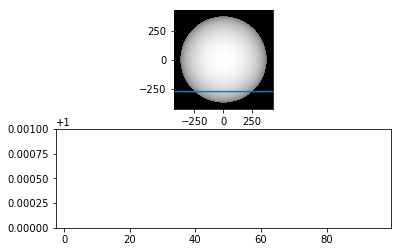

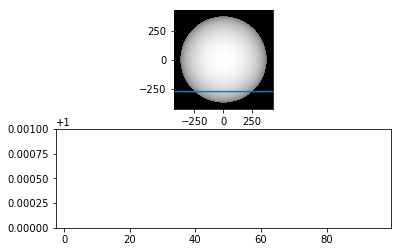

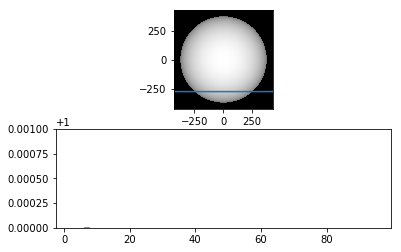

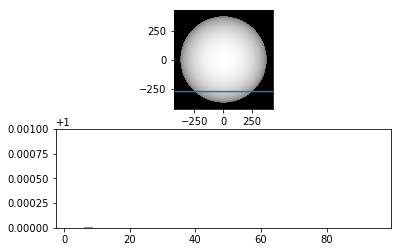

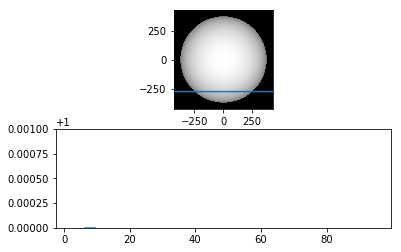

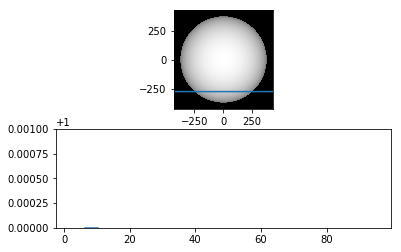

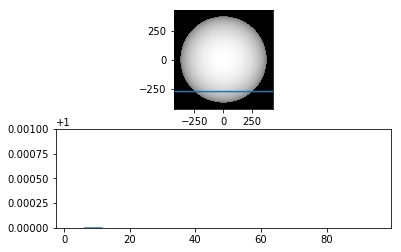

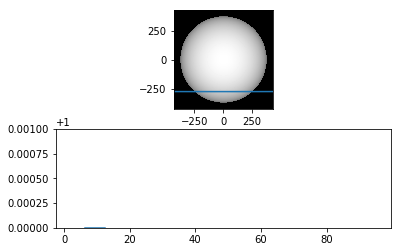

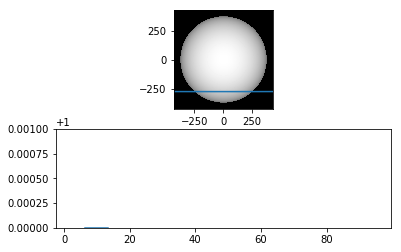

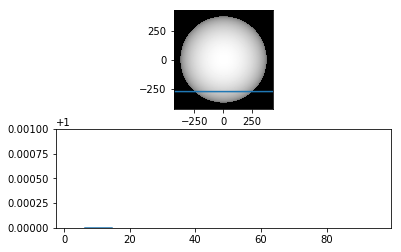

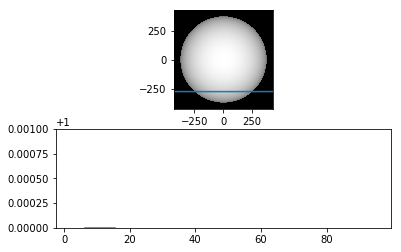

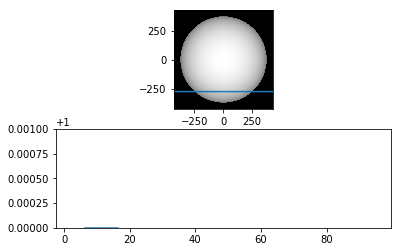

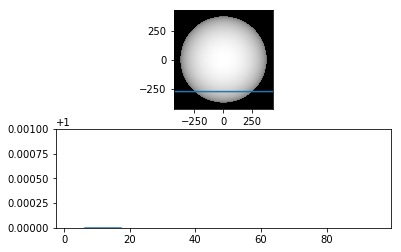

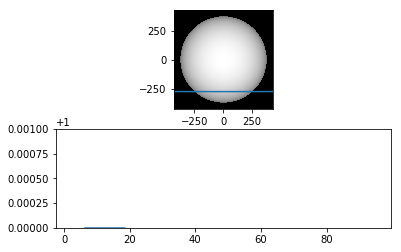

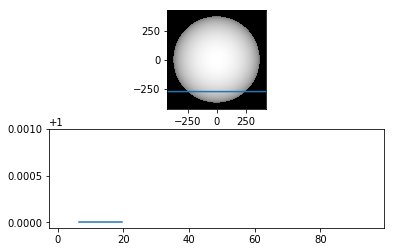

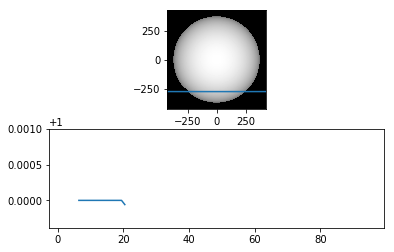

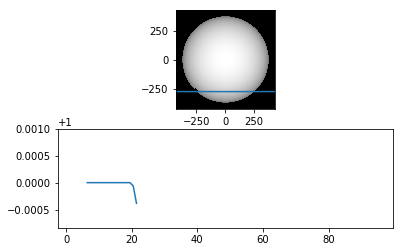

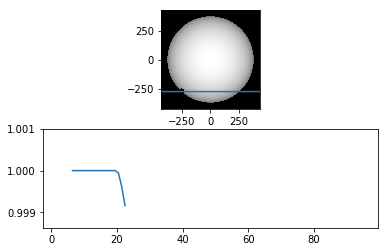

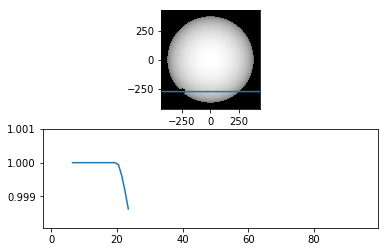

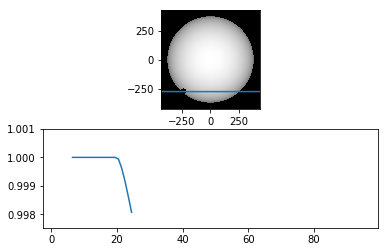

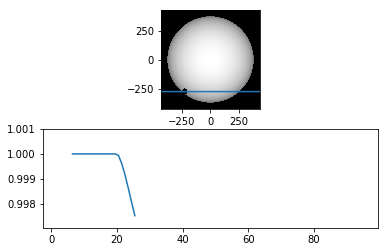

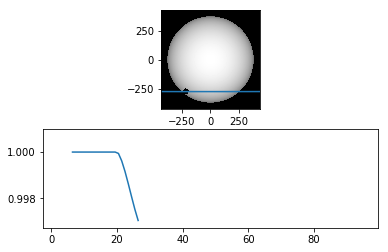

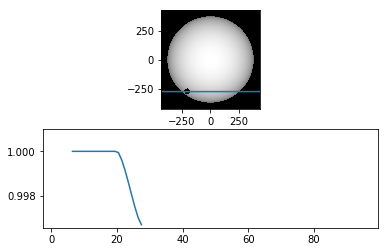

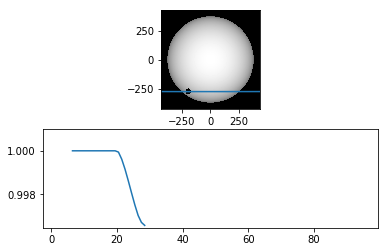

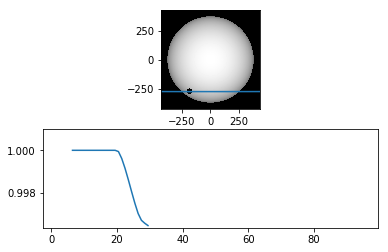

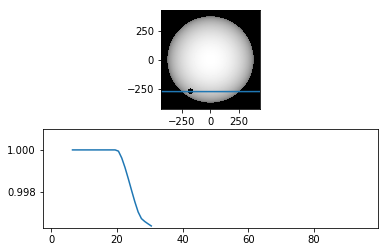

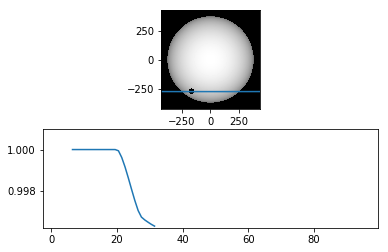

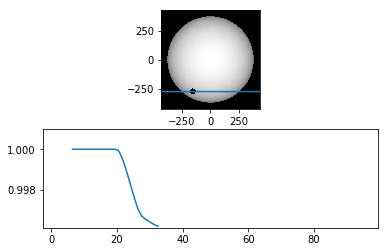

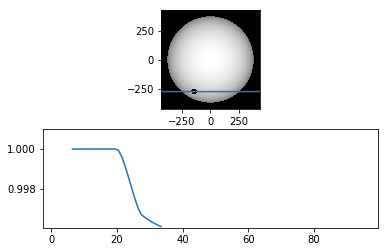

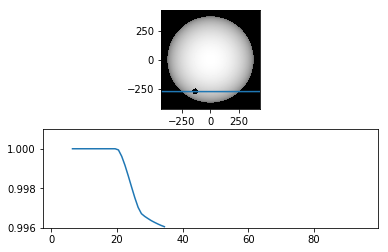

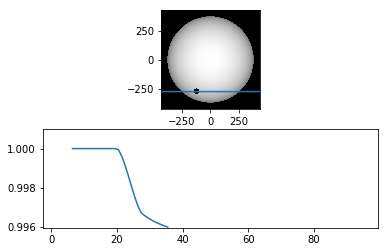

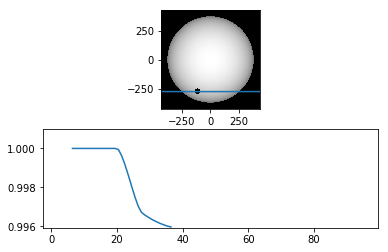

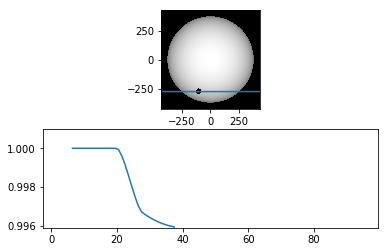

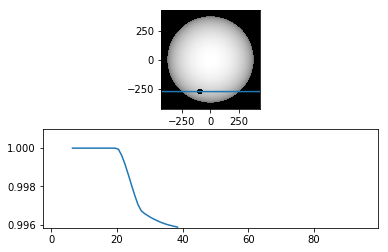

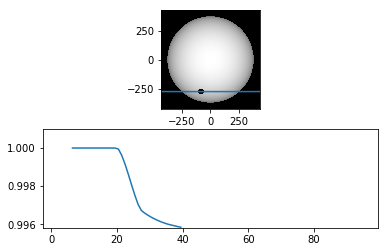

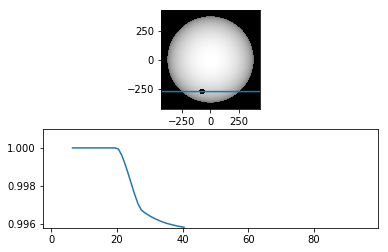

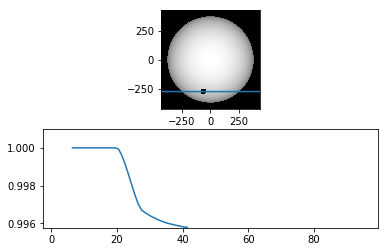

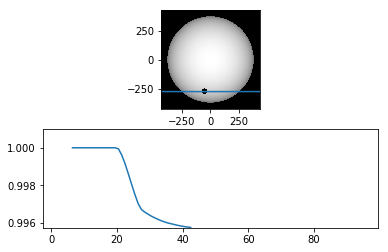

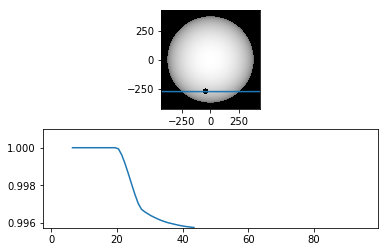

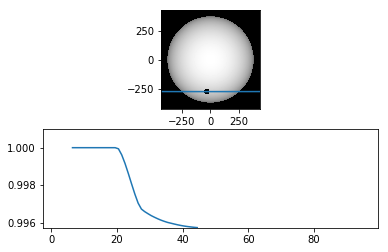

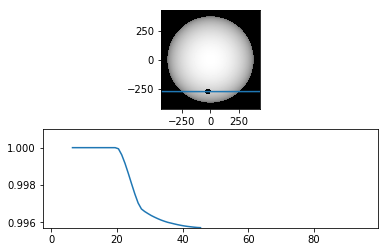

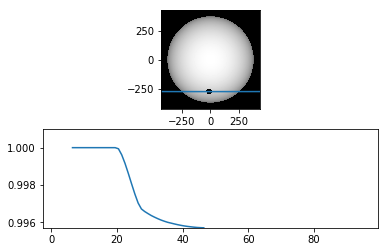

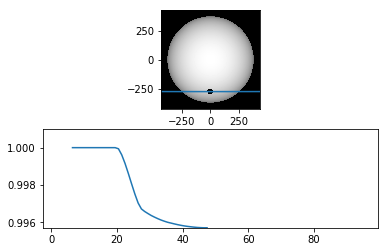

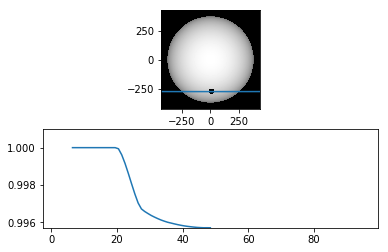

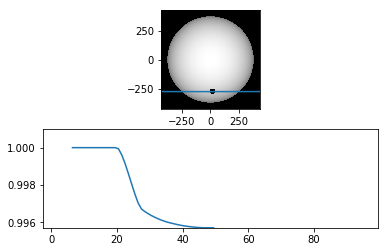

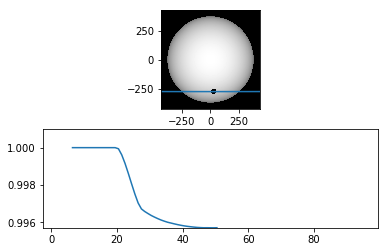

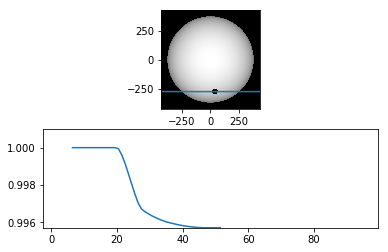

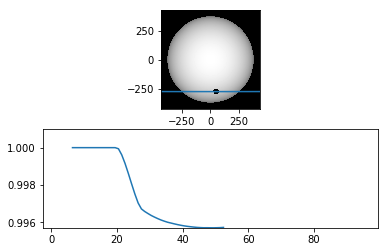

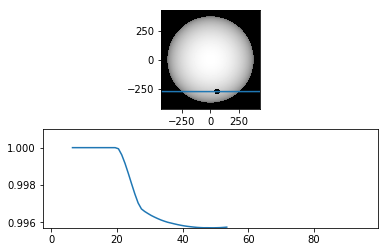

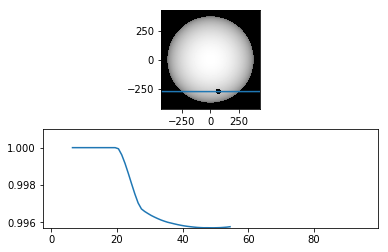

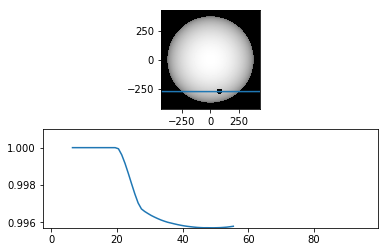

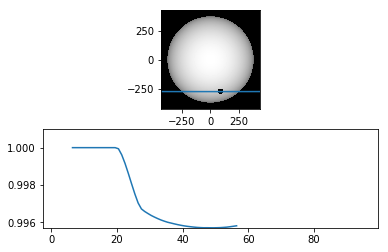

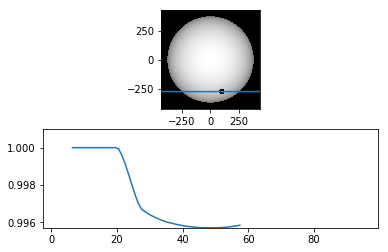

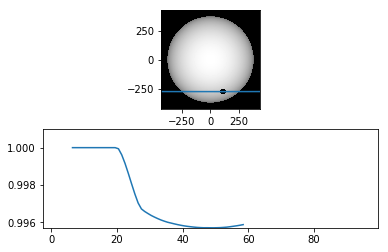

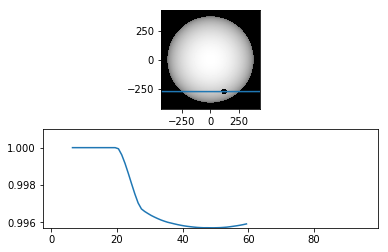

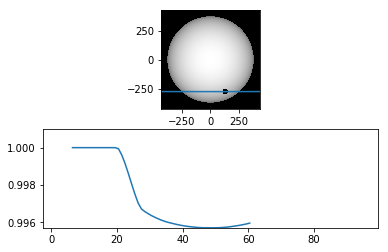

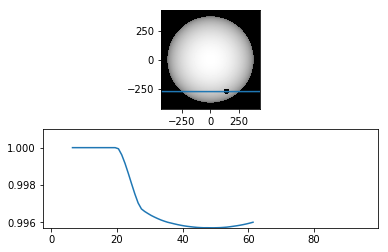

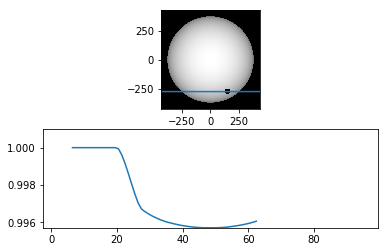

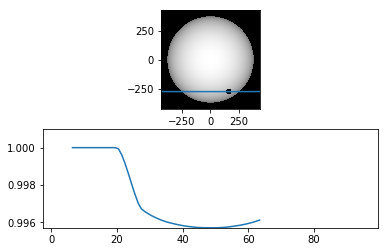

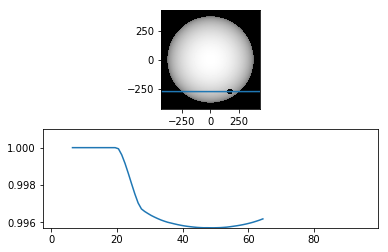

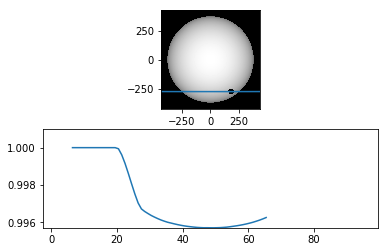

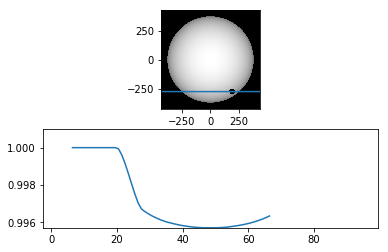

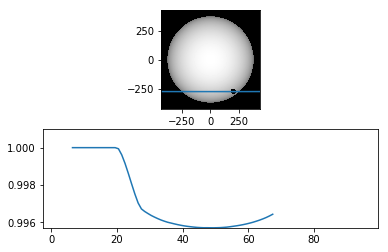

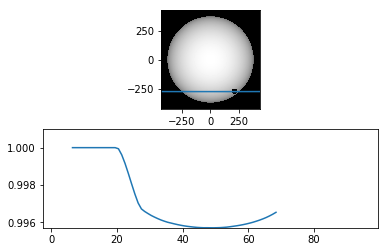

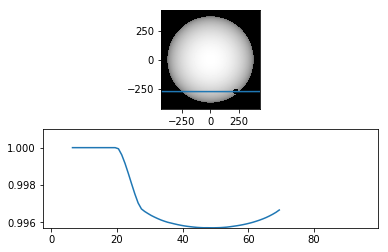

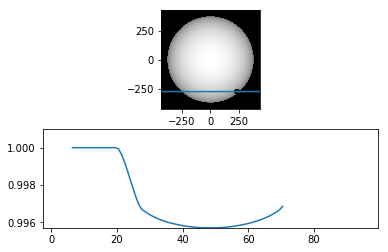

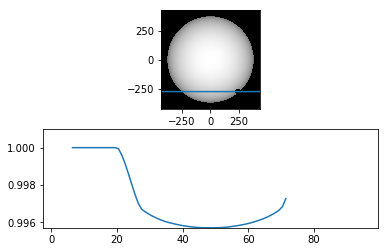

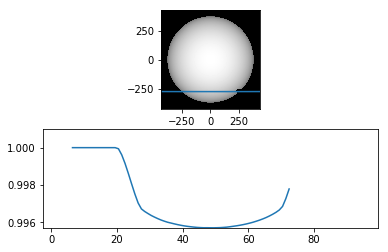

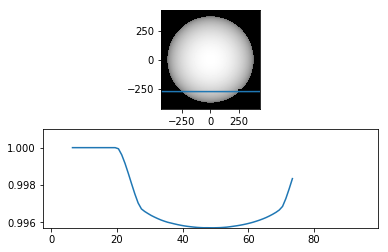

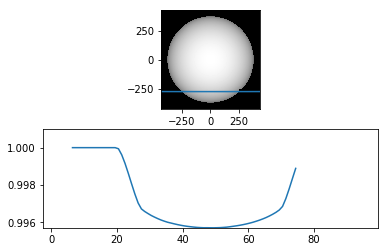

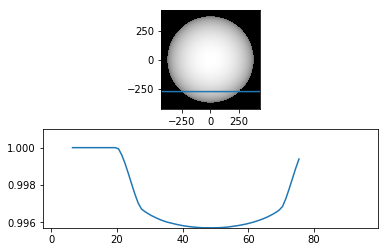

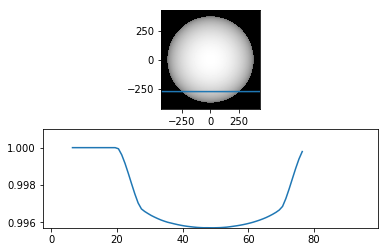

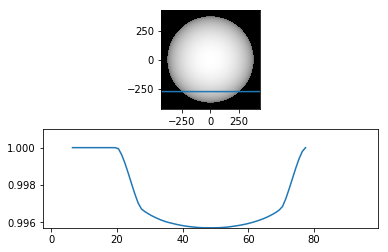

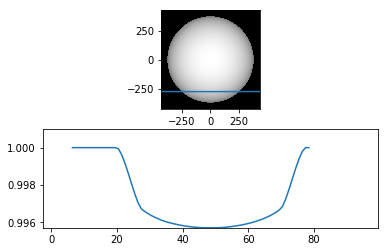

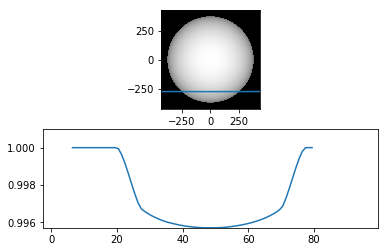

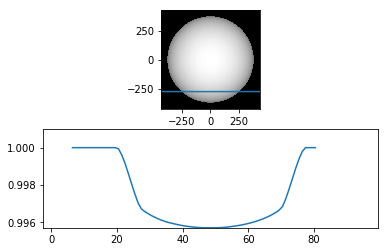

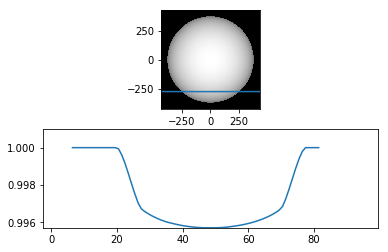

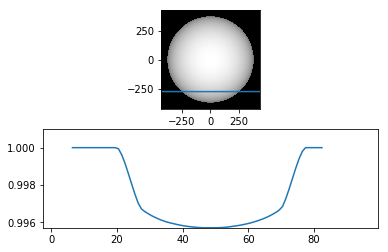

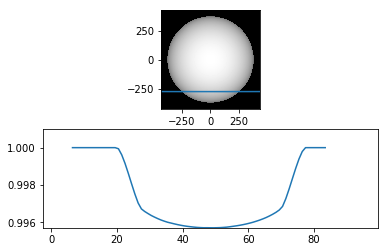

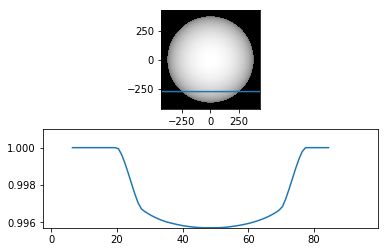

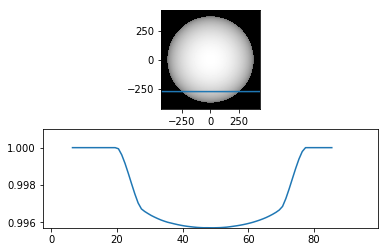

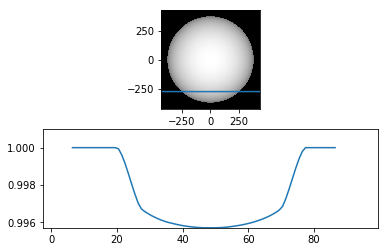

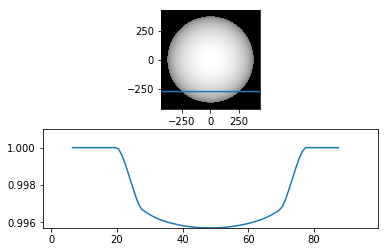

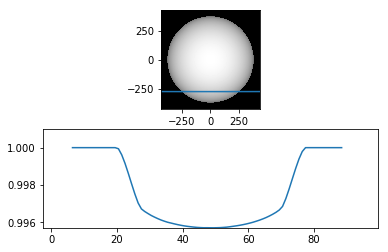

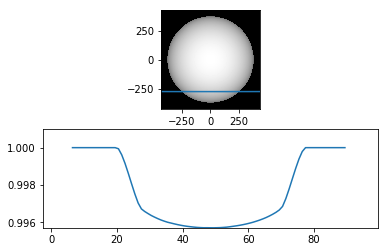

In [60]:
#iterando  i0 e i1 montando os dados do grafico
for i in range(i0,i1):
    plan = np.zeros((n,n),dtype = float)+1 ##matriz de n por n
    x0 = xp[i]+n/2
    y0 = yp[i]+n/2
    ii = np.where((kk/n-y0)**2+(kk-n*np.floor(kk/n)-x0)**2 < Rs**2)
    #plan = np.reshape(plan,(1,np.product(plan.shape)))
    #plan[0][ii[0]]=0
    ##np.shape(plan)    
    #plan = np.reshape(plan,(-1,n))
    ##plan = pd.rolling_mean(plan,3,center = True)
    
    x=(1+np.floor(ii[0]/n))
    y=(ii[0]-n*(np.floor(ii[0]/n)))
    for m in range(len(ii[0])):
       plan[x[m],y[m]]=0  
    wp[i]=np.sum(wl*plan,dtype = float)
    pyplot.subplot(211) 
    imshow(np.copy(wl*plan),cmap="gray",origin='lower',extent=[x1[0],x1[len(x1)-1],y1[0],y1[len(y1)-1]])
    pyplot.plot(xp,yp,'-' )
    pyplot.axis([x1[0],x1[len(x1)-1],y1[0],y1[len(y1)-1]])
    ang = np.arange((np.radians(181)*2))
    lc = wp/wp[0]
    
    ##print(lc)
    d = np.sqrt(xp**2+yp**2)
    ii = np.where(d==min(d))
    ts = np.arange(len(pp[0]))-ii[0]/dt
    pyplot.subplot(212)
    pyplot.plot(ts[i0:i],lc[i0:i])
    pyplot.axis([ts[0],ts[len(ts)-1],min(lc),lc[0]+0.001])
    #pyplot.waitforbuttonpress(.1)                       
    #pyplot.close()
    pyplot.show()

